<center><h1> Homework - 3 - Practical Deep Learning System Performance - CS4090 - Chandan Suri </h1></center>

## Problem 1: Adaptive Learning Rate Methods, CIFAR-10

We will consider five methods, AdaGrad, RMSProp, RMSProp+Nesterov, AdaDelta, Adam, and study their convergence using CIFAR-10 dataset. We will use multi-layer neural network model with two fully connected hidden layers with 1000 hidden units each and ReLU activation with minibatch size of 128.
1. Write the weight update equations for the five adaptive learning rate methods. Explain each term clearly. What are the hyperparameters in each policy ? Explain how AdaDelta and Adam are different from RMSProp.

## Solution 1.1:

Weight Update Equations and Hyperparameters and terms:<br>
In all the equations below, $W_{t+1}$ are the updated weights and $W_{t}$ are the weights at timestep t.<br>
1. AdaGrad:<br>
$W_{t+1} = W_{t} - \frac{\eta}{\sqrt{v_{t} + \epsilon}}.g_{t}$ and 
$v_{t} = v_{t-1} + g_{t} ^ 2$
<br>
Here, $v_{t}$ is a diagonal matrix where each diagonal element is the sum of squares of the gradients upto timestep t, while $\epsilon$ is a smoothing term that prevents the division by zero. Also, $g_{t}$ is the gradient at timestep t and $\eta$ is the learning rate.<br>
Hyperparameters: Here, the main one is the learning rate and the other one is the smoothing parameter which is generally taken to be on the order of 1e-8. <br>
2. RMSProp:<br>
$W_{t+1} = W_{t} - \frac{\eta}{\sqrt{E[g^2]_{t} + \epsilon}}*g_{t}$ and 
$E[g^2]_{t} = \gamma E[g^2]_{t-1} + (1-\gamma)g_{t} ^ 2$
<br>
Here, $E[g^2]_{t}$ is the running average of the squared gradients (till timestep t) at the timestep t and $\gamma$ is analogous to the momentum (Essentially the weightage given to the average of the squared gradients before current timestep t), while $\epsilon$ is a smoothing term that prevents the division by zero. Also, $g_{t}$ is the gradient at timestep t and $\eta$ is the learning rate. Also, generally, $\gamma$ is defined to be 0.9 and according to "Hinton" that values should mostly work for you.<br>
Hyperparameters: Here, we have 3 hyperparameters technically, namely the learning rate, the smoothing parameter and the $\gamma$ term that is analogous to momentum. In the final weight update equation, we can see 2 of them but one of them, $\gamma$ is actually used to compute one of terms in the weight update equation. Generally, the $\gamma$ is set to 0.9 (general practice on how it's used) and the smoothing parameter is generally taken to be on the order of 1e-8. <br>
3. NAdam (RMSProp + Nesterov):<br>
$W_{t+1} = W_{t} - \frac{\eta}{\sqrt{\hat{v}_{t}} + \epsilon}(\beta_1 \hat{m}_{t} + \frac{(1-\beta_1)g_t}{1-\beta_1^t})$ , where <br>
$\hat{v}_{t} = \frac{\beta_{2}v_{t-1} + (1-\beta_{2})g^2_{t}}{1-\beta^t_{2}}$ and $\hat{m}_{t} = \frac{\beta_{1}m_{t-1} + (1-\beta_{1})g_{t}}{1-\beta^t_{1}}$
<br>
$m_{t} = \beta_{1}m_{t-1} + (1-\beta_{1})g_{t}$ and $v_{t} = \beta_{2}v_{t-1} + (1-\beta_{2})g^2_{t}$
<br>
Here, most of the terms are analogous to what we see as a part of the weight update equation for the Adam. $m_{t}$ and $v_{t}$ are the estimates of the first moment (the mean) and the second moment (uncentered variance) of the gradients respectively. $g_{t}$ is the gradient at the timestep t. $\hat{m_{t}}$ and $\hat{v_{t}}$ are the bias-corrected first and second moment estimates because of the bias in the first and second moment terms towards the value of zero. Also, $\eta$ is the learning rate and $\epsilon$ is the smoothing parameter to prevent the division by zero. Furthermore, $\beta_1$ and $\beta_2$ are the weightages assigned to the first and second moment estimates' part that is till the timestep t - 1.
<br>
Hyperparameters: Here, $\beta_1$ and $\beta_2$ are the hyperparameters that help calculate the first and the second moments by assigning some weightages to the first and second moments respectively till the timestep t - 1 when we are calculating the moments for the timestep t. Furthermore, $\eta$ is the learning rate and $\epsilon$ is the smoothing hyperparameter. These are the four hyperparameters used with the NAdam Optimizer. 
<br>
4. AdaDelta:<br>
$W_{t+1} = W_{t} - \frac{RMS[\Delta W]_{t-1}}{RMS[g]_{t}}g_{t}$ , where <br>
$RMS[\Delta W]_{t} = \sqrt{E[\Delta W^{2}]_{t} + \epsilon}$ , and $E[\Delta W^{2}]_{t} = \gamma E[\Delta W^{2}]_{t-1} + (1-\gamma)\Delta W^{2}_{t}$ <br>
$RMS[g]_{t} = \sqrt{E[g^2]_{t} + \epsilon}$
<br>
Here, $E[g^2]_{t}$ is the decaying average over past squared gradients and $RMS[g]_{t}$ is the root mean-squared error criterion of the gradient. The authors note that the units in this update (as well as in SGD, Momentum, or Adagrad) do not match, i.e. the update should have the same hypothetical units as the parameter. To realize this, they first define another exponentially decaying average, this time not of squared gradients but of squared parameter updates, i.e., $E[\Delta W^{2}]_{t}$ using $E[\Delta W^{2}]_{t-1}$ and $\Delta W^{2}_{t}$. Here, $\gamma$ is the weight assigned to the average of the squared parameter updates before the timestep t, till the timestep t - 1. Thus, $RMS[\Delta W]_{t-1}$ is the Root Mean Squared error of the parameter updates.
<br>
Hyperparameters: Here, the hyperparameters are the $\gamma$ and the $\epsilon$. As the learning rate parameter $\eta$ has been eliminated from the update rule, it is not taken as a hyperparameter generally. However, sometimes to decay the steps a little bit in the weight updates equation, $\eta$ is considered as a part of the above weight equation wherein it is multiplied to the subtracted part of the weight update rule. So, sometimes, that could be too but generally it might not be!
<br>
5. Adam: <br>
$W_{t+1} = W_{t} - \frac{\eta}{\sqrt{\hat{v}_{t}} + \epsilon}\hat{m_{t}}$ , where <br>
$\hat{v}_{t} = \frac{\beta_{2}v_{t-1} + (1-\beta_{2})g^2_{t}}{1-\beta^t_{2}}$ and $\hat{m}_{t} = \frac{\beta_{1}m_{t-1} + (1-\beta_{1})g_{t}}{1-\beta^t_{1}}$
<br>
$m_{t} = \beta_{1}m_{t-1} + (1-\beta_{1})g_{t}$ and $v_{t} = \beta_{2}v_{t-1} + (1-\beta_{2})g^2_{t}$
<br>
Here, $m_{t}$ and $v_{t}$ are the estimates of the first moment (the mean) and the second moment (uncentered variance) of the gradients respectively. $g_{t}$ is the gradient at the timestep t. $\hat{m_{t}}$ and $\hat{v_{t}}$ are the bias-corrected first and second moment estimates because of the bias in the first and second moment terms towards the value of zero. Also, $\eta$ is the learning rate and $\epsilon$ is the smoothing parameter to prevent the division by zero. Furthermore, $\beta_1$ and $\beta_2$ are the weightages assigned to the first and second moment estimates' part that is till the timestep t - 1. 
<br>
Hyperparameters: Here, $\beta_1$ and $\beta_2$ are the hyperparameters that help calculate the first and the second moments by assigning some weightages to the first and second moments respectively till the timestep t - 1 when we are calculating the moments for the timestep t. Furthermore, $\eta$ is the learning rate and $\epsilon$ is the smoothing hyperparameter. These are the four hyperparameters used with the Adam Optimizer.
<br>
<br>
RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates. However, from the weight update equation we can clearly deduce this that these are not the same. AdaDelta also computes the RMS of the parameter updates by calculating exponentially decaying average of the squared parameter updates and takes it into consideration in the final update rule, in addition to the RMS error criterion of the gradients. The second part for the both are the same, the former part stated above is the main difference between the two. 
<br>
Adaptive Moment Estimation (Adam) is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients $v_{t}$ like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients $m_{t}$, similar to momentum. Whereas momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface. Adam also counteracts the biases in the moments by using the bias-corrected terms for the moments in the weight update equation. 
<br>
Source Credits: https://ruder.io/optimizing-gradient-descent/index.html <br>
https://personal.math.ubc.ca/~pwalls/math-python/jupyter/latex/ <br>
https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214
---

2. Train the neural network using all the five methods with L2-regularization for 200 epochs each and plot the training loss vs number of epochs. Which method performs best (lowest training loss) ?

## Solution 1.2:

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
import tensorflow as tf

def preprocess_cifar_data(X_train, y_train, X_test, y_test):
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0

    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess_cifar_data(X_train, y_train, X_test, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

def create_dense_network_model(use_dropout = False):
    hidden_units = 1000
    activation_func = 'relu'
    regularizer = 'l2'
    initializer = 'HeNormal'
    outputs_num = 10
    output_layer_activation_func = 'softmax'

    model = Sequential()
    model.add(Flatten())
    if use_dropout:
        model.add(Dropout(0.2))
    model.add(Dense(hidden_units, activation = activation_func, 
                    kernel_regularizer = regularizer, 
                    kernel_initializer = initializer))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(hidden_units, activation = activation_func, 
                    kernel_regularizer = regularizer, 
                    kernel_initializer = initializer))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(outputs_num, activation = output_layer_activation_func))

    return model

In [8]:
import time

def compile_and_run_model(model, optimizer_name, X_train, y_train, X_test, y_test):
    if optimizer_name == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001, 
                                                initial_accumulator_value = 0.1, 
                                                epsilon = 1e-7)
    elif optimizer_name == 'RMSProp':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001, 
                                                rho = 0.9, momentum = 0, 
                                                epsilon = 1e-7, centered = False)
    elif optimizer_name == 'RMSProp + Nesterov':
        optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001, beta_1 = 0.9, 
                                              beta_2 = 0.999, epsilon = 1e-7)
    elif optimizer_name == 'AdaDelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.001, 
                                                 rho = 0.95, epsilon = 1e-7)
    elif optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, 
                                             beta_2 = 0.999, epsilon = 1e-7, 
                                             amsgrad = False)

    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    start = time.time()
    history = model.fit(X_train, y_train, batch_size = 128, epochs = 200, shuffle = True, verbose = 0)
    scores = model.evaluate(X_test, y_test, verbose=1)
    end = time.time()

    return history, end - start, scores

In [9]:
optimizer_names = ['Adagrad', 'RMSProp', 'RMSProp + Nesterov', 'AdaDelta', 'Adam']

def run_dense_model_with_optimizers(use_dropout = False):
    loss_histories = dict()
    training_times = dict()
    acc_histories = dict()

    for optimizer_name in optimizer_names:
        print(f'Using Optimizer {optimizer_name}')
        dense_model = create_dense_network_model(use_dropout)
        history, training_time, scores = compile_and_run_model(dense_model, optimizer_name, 
                                                               X_train, y_train, 
                                                               X_test, y_test)
        loss_histories[optimizer_name] = history.history['loss']
        acc_histories[optimizer_name] = scores[1]
        training_times[optimizer_name] = training_time
        print(f'Test Loss: {scores[0]}, Test Accuracy: {scores[1]}')

    return loss_histories, acc_histories, training_times

In [14]:
loss_histories, acc_histories_1, training_times_1 = run_dense_model_with_optimizers()

Using Optimizer Adagrad
313/313 [==============================] - 1s 3ms/step - loss: 1.6733 - accuracy: 0.5082
Test Loss: 1.6732580661773682, Test Accuracy: 0.5081999897956848
Using Optimizer RMSProp
313/313 [==============================] - 1s 3ms/step - loss: 1.7965 - accuracy: 0.3845
Test Loss: 1.79652738571167, Test Accuracy: 0.38449999690055847
Using Optimizer RMSProp + Nesterov
313/313 [==============================] - 1s 3ms/step - loss: 1.6229 - accuracy: 0.4488
Test Loss: 1.6229182481765747, Test Accuracy: 0.4487999975681305
Using Optimizer AdaDelta
313/313 [==============================] - 1s 3ms/step - loss: 7.1686 - accuracy: 0.4523
Test Loss: 7.168554782867432, Test Accuracy: 0.4523000121116638
Using Optimizer Adam
313/313 [==============================] - 1s 3ms/step - loss: 1.6304 - accuracy: 0.4545
Test Loss: 1.630354642868042, Test Accuracy: 0.4544999897480011


In [12]:
import matplotlib.pyplot as plt

def plot_loss_histories(loss_histories, using_dropout = False):
    fig = plt.figure(figsize = (12, 10))
    for optimizer_name, loss_history in loss_histories.items():
        plt.plot(range(1, 201), loss_history, label = optimizer_name)
    if using_dropout:
        title = 'Epochs vs Training Loss with Dropouts in Model'
    else:
        title = 'Epochs vs Training Loss with No Dropouts in Model'
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.legend(loc = 'upper left')
    plt.grid()
    plt.show()

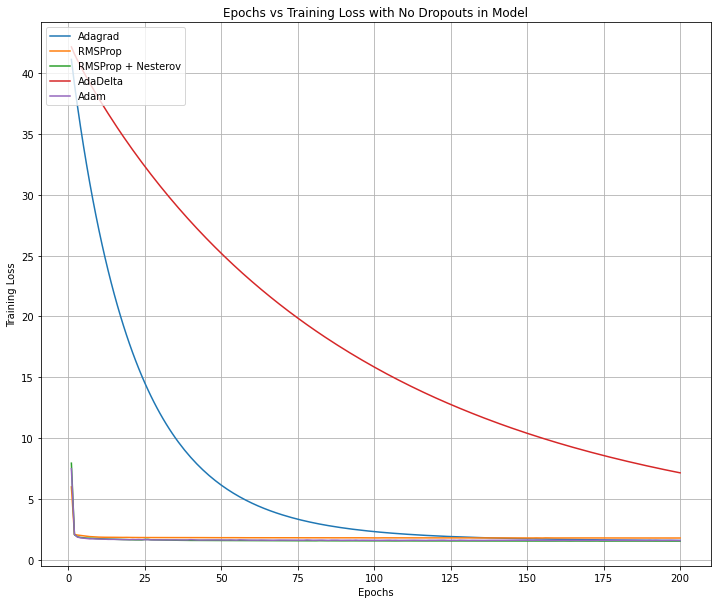

In [15]:
plot_loss_histories(loss_histories)

Amongst all 5 of them, RMSProp + Nesterov performs the best according to the Train Loss, wherein it has the least Training Loss. Although as we can see Adam, Adagrad and NAdam perform marginally the same according to the Train Loss. While the accuracy for Adagrad is the most among them. It looks like Adagrad is able to generalize better so, all in all Adagrad performs better in comparison to the other two. As the margin is very close, My FINAL Answer would be that Adagrad is performing the best here.

3. Add dropout (probability 0.2 for input layer and 0.5 for hidden layers) and train the neural network again using all the five methods for 200 epochs. Compare the training loss with that in part 2. Which method performs the best ? For the five methods, compare their training time (to finish 200 epochs with dropout) to the training time in part 2 (to finish 200 epochs without dropout).

## Solution 1.3:

In [10]:
loss_histories, acc_histories_2, training_times_2 = run_dense_model_with_optimizers(True)

Using Optimizer Adagrad
313/313 [==============================] - 1s 3ms/step - loss: 1.6934 - accuracy: 0.4777
Test Loss: 1.693449854850769, Test Accuracy: 0.47769999504089355
Using Optimizer RMSProp
313/313 [==============================] - 1s 3ms/step - loss: 2.0791 - accuracy: 0.2463
Test Loss: 2.07905912399292, Test Accuracy: 0.24629999697208405
Using Optimizer RMSProp + Nesterov
313/313 [==============================] - 1s 3ms/step - loss: 2.0610 - accuracy: 0.2628
Test Loss: 2.061002254486084, Test Accuracy: 0.262800008058548
Using Optimizer AdaDelta
313/313 [==============================] - 1s 3ms/step - loss: 7.7692 - accuracy: 0.4005
Test Loss: 7.7691521644592285, Test Accuracy: 0.40049999952316284
Using Optimizer Adam
313/313 [==============================] - 1s 3ms/step - loss: 2.1277 - accuracy: 0.2086
Test Loss: 2.127664089202881, Test Accuracy: 0.2085999995470047


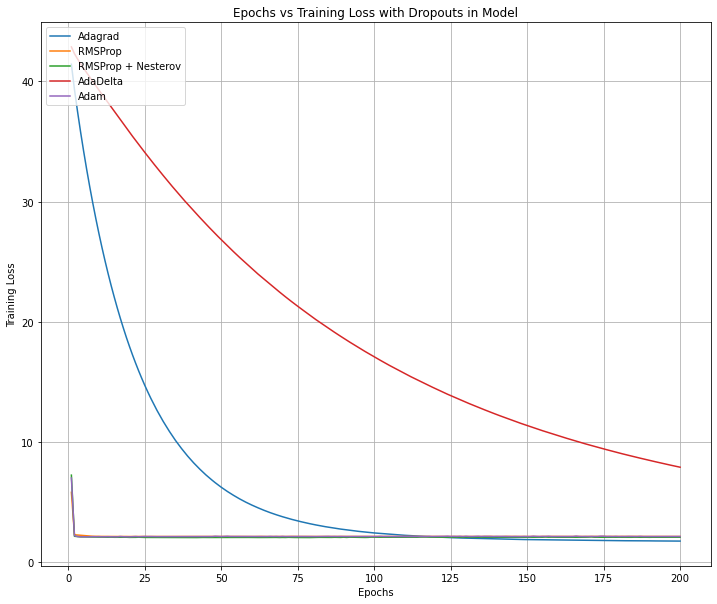

In [13]:
plot_loss_histories(loss_histories, True)

Training Loss Comparisons: <br>
1. AdaGrad: This performs about the same for both the cases. However, with Dropouts, it seems that the model performs a little worse.
2. RMSProp: This performs better for the case when no Dropouts were being considered. 
3. RMSProp + Nesterov: This also performs better for the case when no Dropouts were being considered.
4. AdaDelta: This also performs better for the case when no Dropouts were being considered.
5. Adam: This also performs better for the case when no Dropouts were being considered.
<br>
Again here, Adagrad performs the best according to the training loss. 

In [16]:
def plot_training_times_for_optimizers(training_times_1, training_times_2):
    fig = plt.figure(figsize = (20, 10))
    plt.bar([optimizer_name + '+ND' for optimizer_name in list(training_times_1.keys())], 
            list(training_times_1.values()))
    plt.bar([optimizer_name + '+D' for optimizer_name in list(training_times_2.keys())], 
            list(training_times_2.values()))
    title = 'Training Times for different Optimizers with and without Droputs'
    plt.title(title)
    plt.xlabel('Optimizer + Dropout (D) or No Dropout (ND)')
    plt.ylabel('Training Times')
    plt.legend(loc = 'upper left')
    plt.show()

No handles with labels found to put in legend.


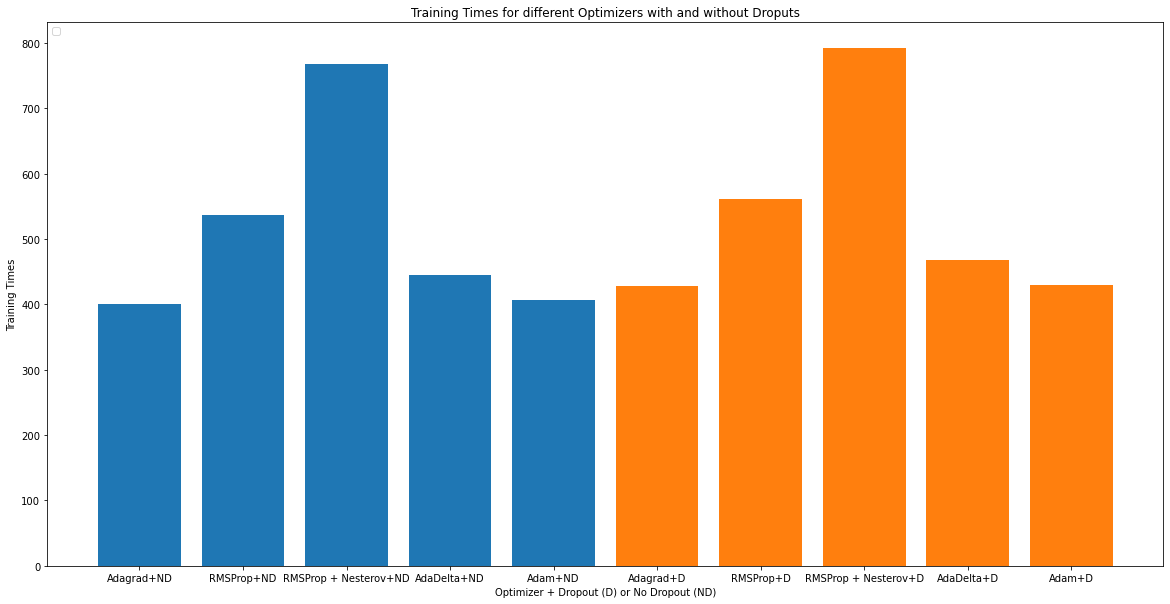

In [17]:
plot_training_times_for_optimizers(training_times_1, training_times_2)

4. Compare test accuracy of trained model for all the five methods from part 2 and part 3. Note that to calculate test accuracy of model trained using dropout you need to appropriately scale the weights (by the dropout probability).

## Solution 1.4:

In [18]:
def plot_test_accuracies_for_optimizers(acc_histories_1, acc_histories_2):
    fig = plt.figure(figsize = (20, 10))
    plt.bar([optimizer_name + '+ND' for optimizer_name in list(acc_histories_1.keys())], 
            list(acc_histories_1.values()))
    plt.bar([optimizer_name + '+D' for optimizer_name in list(acc_histories_2.keys())], 
            list(acc_histories_2.values()))
    title = 'Test Accuracies for different Optimizers with and without Droputs'
    plt.title(title)
    plt.xlabel('Optimizer + Dropout(D) or No Dropout(ND)')
    plt.ylabel('Test Accuracy')
    plt.legend(loc = 'upper left')
    plt.show()

In [19]:
plot_test_accuracies_for_optimizers(acc_histories_1, acc_histories_2)

No handles with labels found to put in legend.


## Problem 2: Learning Rate, Batch Size, FashionMNIST

Recall cyclical learning rate policy discussed in Lecture 4. The learning rate changes in cyclical manner between lrmin and lrmax, which are hyperparameters that need to be specified. For this problem you first need to read carefully the article referenced below as you will be making use of the code there (in Keras) and modifying it as needed. For those who want to work in Pytorch there are open source implementations of this policy available which you can easily search for and build over them. You will work with FashionM- NIST dataset and MiniGoogLeNet (described in reference). If you cannot get MiniGoogleNet code from the reference you can do this question using LeNet.

1. Summarize FashionMNIST dataset, total dataset size, training set size, validation set size, number of classes, number of images per class. Show any 3 representative images from any 3 classes in the dataset.

## Solution 2.1: 

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import fashion_mnist
import tensorflow as tf
import warnings
import time
import random
import cv2
import pickle
warnings.filterwarnings('ignore')


from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import Session, ConfigProto, GPUOptions
tf_config = ConfigProto(gpu_options=GPUOptions(allow_growth=False))
session = Session(config=tf_config)
set_session(session)

from pyimagesearch.learningratefinder import LearningRateFinder
from pyimagesearch.minigooglenet import MiniGoogLeNet
from pyimagesearch.clr_callback import CyclicLR
from pyimagesearch import config

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f'Training Data Size: {X_train.shape}')
print(f'Validation Data Size: {X_test.shape}')
print(f'Total Data Size: {X_train.shape[0] + X_test.shape[0]}')
print(f'Number of Classes in Training Data: {len(np.unique(y_train))}')
print(f'Number of Classes in Validation Data: {len(np.unique(y_test))}')
print(f'Number of Images Per Class in Training Data: {list(np.unique(y_train, return_counts = True)[1])}')
print(f'Number of Images Per Class in Validation Data: {list(np.unique(y_test, return_counts = True)[1])}')

# Show Images
fig,axes = plt.subplots(3,3,figsize=(20,20))
image_range = 50
labels_indices_map = dict()
for idx in range(image_range):
    if y_train[idx] in labels_indices_map:
        labels_indices_map[y_train[idx]].append(idx)
    else:
        labels_indices_map[y_train[idx]] = [idx]
count_taken = 0
labels_mapped = list(labels_indices_map.keys())
for label in labels_mapped:
    if count_taken > 2:
        break
    if len(labels_indices_map[label]) > 2:
        for i in range(3):
            ax = axes[count_taken,i]
            ax.imshow(X_train[labels_indices_map[label][i]])
            if i == 1:
                ax.set_title("Class Label: "+str(label))
            ax.axis('off')
        count_taken += 1

Training Data Size: (60000, 28, 28)
Validation Data Size: (10000, 28, 28)
Total Data Size: 70000
Number of Classes in Training Data: 10
Number of Classes in Validation Data: 10
Number of Images Per Class in Training Data: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
Number of Images Per Class in Validation Data: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


2. Fix batch size to 64 and start with 10 candidate learning rates between 10^−9 and 10^1 and train your model for 5 epochs. Plot the training loss as a function of learning rate. You should see a curve like Figure 3 in reference below. From that figure identify the values of lrmin and lrmax.

## Solution 2.2:

In [16]:
def create_le_net():
    model = Sequential()
    model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
    model.add(keras.layers.AveragePooling2D())
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(keras.layers.AveragePooling2D())
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=120, activation='relu'))
    model.add(keras.layers.Dense(units=84, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation = 'softmax'))
    return model

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Fashion MNIST images are 28x28 but the network we will be training
# is expecting 32x32 images
X_train = np.array([cv2.resize(x, (32, 32)) for x in X_train])
X_test = np.array([cv2.resize(x, (32, 32)) for x in X_test])

# scale the pixel intensities to the range [0, 1]
X_train = X_train.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

# reshape the data matrices to include a channel dimension (required
# for training)
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

# convert the labels from integers to vectors
n_classes = np.unique(y_train).shape[0]
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

In [6]:
# initialize the optimizer and model
train_loss = []
test_loss = []
models = []
history = []
lr_set = np.logspace(-9,1,11)

for lr in lr_set:
    optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    model = create_le_net()
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer_sgd, metrics = ["accuracy"])

    history_for_lr = model.fit(X_train, y_train,validation_split = 0.2,epochs = 5,batch_size = 64,verbose = 0)

    history.append(history_for_lr)
    models.append(model)

    train_scores = model.evaluate(X_train,y_train,verbose = 0)
    test_scores = model.evaluate(X_test, y_test, verbose = 0)

    train_loss.append(train_scores[0])
    test_loss.append(test_scores[0])

2021-10-30 20:25:56.709387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 20:25:56.710337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 20:25:56.711309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 20:25:56.712407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 20:25:56.713252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(lr_set,train_loss,label="Train Loss")
ax.plot(lr_set,test_loss,label="Test Loss")

ax.set_xscale('log')
ax.set_xlabel("Learning Rate")

ax.axvline(1e-5, c='y', linestyle='--', label='LRMin')
ax.axvline(1e-2, c='m', linestyle='--', label='LRMax')

ax.set_ylabel("Loss")

ax.legend()
plt.show()

3. Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and lrmin and lrmax values obtained in part 1. Here you will train till convergence and not just 5 epochs as in part 2. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference).

## Solution 2.3: 

In [18]:
lr_min = 1e-5
lr_max = 1e-2

In [9]:
step_size = 5 * (X_train.shape[0] // 64)

clr = CyclicLR(mode = "exp_range", base_lr = lr_min, max_lr = lr_max,
              gamma = 0.9, step_size = step_size)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

optimizer_sgd = tf.keras.optimizers.SGD(learning_rate = lr_min, momentum = 0.9)
model_lrc = create_le_net()

model_lrc.compile(loss = "categorical_crossentropy", optimizer = optimizer_sgd, metrics = ["accuracy"])

loss_history = LossHistory()
history_lrc = model_lrc.fit(X_train, y_train, validation_split = 0.2,
                            epochs = 200, batch_size = 64,
                            callbacks=[clr, loss_history], verbose = 0)

In [10]:
val_losses = [0] * len(loss_history.losses)
offset = len(loss_history.losses)//len(history_lrc.history['val_loss'])

for i in range(offset):
    for j in range(len(history_lrc.history['val_loss'])):
          val_losses[j * offset + i] = history_lrc.history['val_loss'][j]

val_accuracies = [0] * len(loss_history.acc)
offset = len(loss_history.acc)//len(history_lrc.history['val_loss'])

for i in range(offset):
    for j in range(len(history_lrc.history['val_accuracy'])):
          val_accuracies[j * offset + i] = history_lrc.history['val_accuracy'][j]

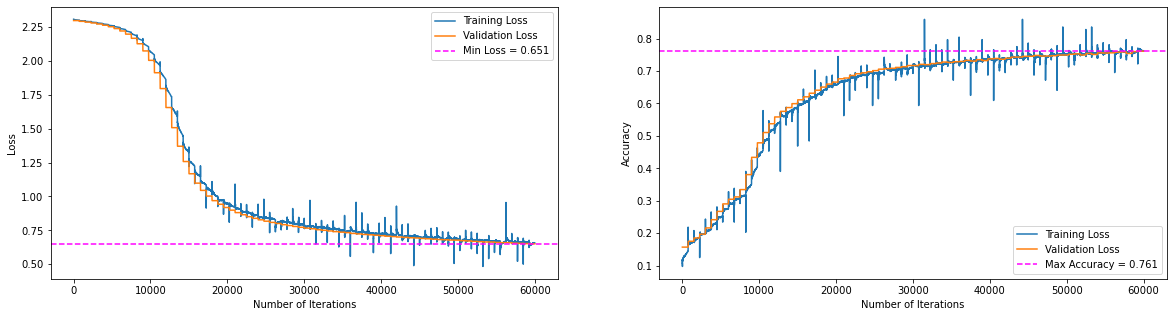

In [11]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(loss_history.losses[:60000],label='Training Loss')
ax[0].plot(val_losses[:60000],label='Validation Loss')
ax[0].axhline(min(val_losses[:60000]),
              c='magenta',
              linestyle='--',
              label="Min Loss = " + str(round(min(val_losses[:60000]),3)))
ax[0].set_xlabel('Number of Iterations')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(loss_history.acc[:60000],label='Training Loss')
ax[1].plot(val_accuracies[:60000],label='Validation Loss')
ax[1].axhline(max(val_accuracies[:60000]),
              c='magenta',
              linestyle='--',
              label="Max Accuracy = " + str(round(max(val_accuracies[:60000]),3)))
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

4. Fix learning rate to lrmin and train your network starting with batch size 64 and going upto 8192. Instead of training the network with different batch sizes for same number of epochs (as in part 2) you should train it for same number of iterations to get the training loss. You can keep the number of iterations to train equal to the number of iterations when doing 5 epochs with a batch size of 64. If your GPU cannot handle large batch sizes, you can employ effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss as a function of batch size. Do you see a similar behavior of training loss with respect to batch size as seen in part 2 with respect to learning rate ?

## Solution 2.4: 

In [27]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
batches = np.logspace(6, 13, 8, base = 2)
step_size = 5 * (X_train.shape[0] // 64)

train_loss2 = []
test_loss2 = []
models2 = []
history2 = []

optimizer_sgd = tf.keras.optimizers.SGD(learning_rate = lr_min, momentum = 0.9)
for batch in batches:
    model2 = create_le_net()
    model2.compile(loss = "categorical_crossentropy", optimizer = optimizer_sgd, metrics = ["accuracy"])

    history_per_batch = model2.fit(X_train, y_train, 
                                   validation_split = 0.2, 
                                   epochs = 5, batch_size = int(batch),
                                   steps_per_epoch = step_size,
                                   verbose = 0)
    history2.append(history_per_batch)
    models2.append(model2)

    train_scores = model2.evaluate(X_train,y_train,verbose = 0)
    test_scores = model2.evaluate(X_test,y_test,verbose = 0)

    train_loss2.append(train_scores[0])
    test_loss2.append(test_scores[0])

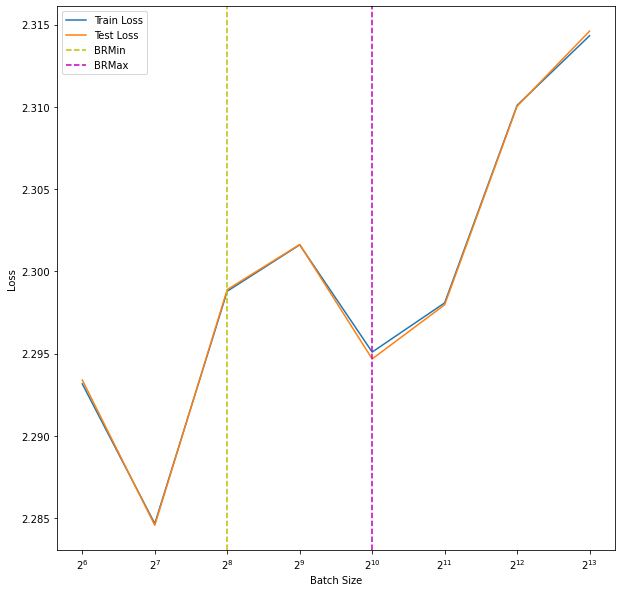

In [29]:
fig,ax = plt.subplots(1,1,figsize = (10,10))

ax.plot(batches, train_loss2, label="Train Loss")
ax.plot(batches, test_loss2, label="Test Loss")

ax.axvline(2**8, c='y', linestyle='--', label='BRMin')
ax.axvline(2**10, c='m', linestyle='--', label='BRMax')

ax.legend()
ax.set_xscale('log', basex=2)
ax.set_xlabel("Batch Size")
ax.set_ylabel("Loss")
plt.show()

The behaviour is more or less the same with some minor changes in the overall flow.

5. Can you identify bmin and bmax from the figure in part 4 for devising a cyclical batch size policy ? Create an algorithm for automatically determining batch size and show its steps in a block diagram as in Figure 1 of reference.

## Solution 2.5: 

In [19]:
b_min = 2**8
b_max = 2**10

In [21]:
batch_iterations = 0
step_size = 10
gamma = 0.9
scale_fn = lambda x: gamma ** (x)

def cycle_batch():
    global batch_iterations
    cycle = np.floor(1 + batch_iterations / (2 * step_size))
    x = np.abs(batch_iterations / step_size - 2 * cycle + 1)
    batch_iterations+=1
    
    return int(np.floor(b_min + (b_max - b_min) * np.maximum(0, (1 - x)) * scale_fn(cycle)))

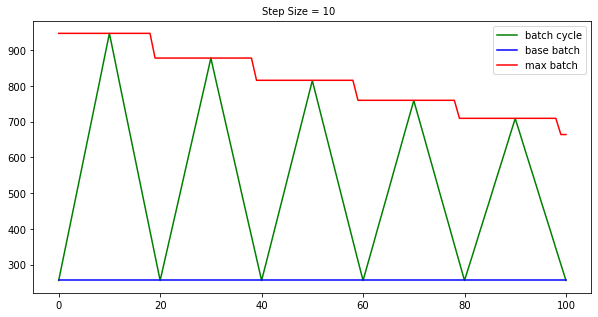

In [6]:
y = []
x = []
h = []
l = []

for i in range(101):
    x.append(batch_iterations)
    y.append(cycle_batch())
    l.append(b_min)
    cycle = np.floor(1 + batch_iterations / (2 * step_size))
    x1 = np.abs(batch_iterations / step_size - 2 * cycle + 1)
    h.append(b_min + (b_max-b_min) * scale_fn(cycle))

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x,y,c='g',label="batch cycle")
ax.plot(x,l,c='b',label="base batch")
ax.plot(x,h,c='r',label="max batch")
ax.legend()
ax.text(40, 1000, "Step Size = 10")
plt.show()

6. Use bmin and bmax values identified in part 3 and devise a cyclical batch size policy such that the batch size changes in a cyclical manner between bmin and bmax. In part 3 we did exponential de- crease in learning rate as training progress. What should be an analogous trajectory for batch size as training progresses, exponential increase or decrease ? Use cyclical batch size policy (with appropriate trajectory) and train your network using learning rate lrmin.

## Solution 2.6: 

In [26]:
model_brc = create_le_net()
opt = tf.keras.optimizers.SGD(learning_rate=lr_min, momentum=0.9)
model_brc.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
h_brc = dict()
h_brc['loss'] = []
h_brc['val_loss'] = []
h_brc['accuracy'] = []
h_brc['val_accuracy'] = []
n = 5 * (X_train.shape[0] // 64)
for i in range(n):
    batch_size = cycle_batch()
    h = model_brc.fit(X_train, y_train,
                      validation_split = 0.2, 
                      epochs = 1, batch_size = batch_size,
                      verbose = 0)
    h_brc['loss'].append(h.history['loss'][0])
    h_brc['val_loss'].append(h.history['val_loss'][0])
    h_brc['accuracy'].append(h.history['accuracy'][0])
    h_brc['val_accuracy'].append(h.history['val_accuracy'][0])

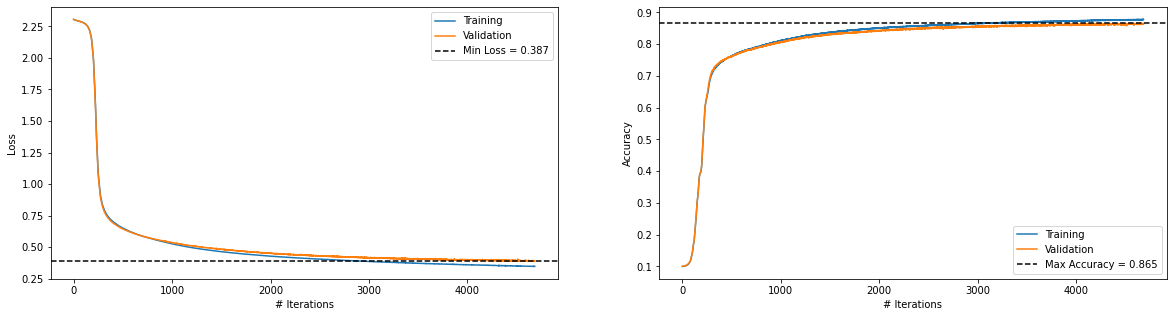

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(h_brc['loss'],label='Training')
ax[0].plot(h_brc['val_loss'],label='Validation')
ax[0].axhline(min(h_brc['val_loss']),c='black',linestyle='--',label="Min Loss = " + 
              str(round(min(h_brc['val_loss']),3)))
ax[0].set_xlabel('# Iterations')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(h_brc['accuracy'],label='Training')
ax[1].plot(h_brc['val_accuracy'],label='Validation')
ax[1].axhline(max(h_brc['val_accuracy']),c='black',linestyle='--',label="Max Accuracy = " + 
              str(round(max(h_brc['val_accuracy']),3)))
ax[1].set_xlabel('# Iterations')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

7. Compare the best accuracy from the two cyclical policies. Which policy gives you the best accuracy ?

## Solution 2.7: 

After the same number of iterations, the cyclic batch rate policy gives us better accuracy (86.5%) compared to the cyclic learning rate (76.1%) policy.
However, this can just be due to the larger size of data trained over, as our batch sizes were significantly over 64 (which was the batch rate for cyclic learning rate)

## Problem 3: Convolutional Neural Networks Architectures

In this problem we will study and compare different convolutional neural network architectures. We will calculate number of parameters (weights, to be learned) and memory requirement of each network. We will also analyze inception modules and understand their design.


1. Calculate the number of parameters in Alexnet. You will have to show calculations for each layer and then sum it to obtain the total number of parameters in Alexnet. When calculating you will need to account for all the filters (size, strides, padding) at each layer. Look at Sec. 3.5 and Figure 2 in Alexnet paper (see reference). Points will only be given when explicit calculations are shown for each layer.


## Solution 3.1:

The formulas used for different layers following different computations are as follows:<br> 

First, let's go over different variables used for the convolutional layer:
In CNN, each of the convolution layers have 2 different kind of parameters, weights and biases. The total number of parameters for this layer is thus, computed to be the sum of the toal number of weight parameters and number of bias parameters. This gives us the total number of parameters for the convolution layer.
Below shown are some of the notations used, <br>
$W_{c} = $ Number of weights in the convolution layer,<br>
$B_{c} = $ Number of biases in the convolution layer, <br>
$P_{c} = $ Number of total parameters in the convolution layer, <br>
$K = $ Size of the kernel (width) used in the convolution layer, <br>
$N = $ Number of kernels, <br>
$C = $ Number of channels in the input image or previous layer<br><br>

So, the formulaes for the convolution layer are as follows:<br>

$W_{c} = K^{2} * C * N$, <br>
$B_{c} = N$, <br>
$P_{c} = W_{c} + B_{c}$ <br><br>

Secondly, for the number of parameters for the Max Pool Layer, we don't need to compute anything as there are no parameters associated with the Max Pool Layer (learnable parameters). The pool size, stride and padding are hyperparameters.<br>

Thirdly, for the number of parameters for a Fully Connected Layer, there are 2 sub-cases here: <br>
Case 1: Number of parameters for a fully connected layer connected to a Conv Layer<br>
Below shown are some of the notations used, <br>
$W_{cf} = $ Number of weights of a fully connected layer that is connected to a convolution layer (the one before it), <br>
$B_{cf} = $ Number of biases of a fully connected layer that is connected to a convolution layer (the one before it), <br>
$P_{cf} = $ Number of paremeters of the fully connected layer included both the weights and biases, <br>
$O = $ Size (width) of the output of the previous layer, <br>
$C = $ Number of the channels in the previous convolution layer, <br>
$F = $ Number of neurons in the fully connected layer <br><br>

So, the formulaes for the fully connected layer connected to a convolution layer are as follows:<br>
$W_{cf} = O^{2} * C * F$, <br>
$B_{cf} = F$, <br>
$P_{cf} = W_{cf} + B_{cf}$ <br>
<br>
Case 2: Number of paremeters for a fully connected layer connected to a fully connected layer (previous)<br>
Below shown are some of the notations used, <br>
$W_{ff} = $ Number of weights of a fully connected layer that is connected to a fully connected layer (the one before it), <br>
$B_{ff} = $ Number of biases of a fully connected layer that is connected to a fully connected layer (the one before it), <br>
$P_{ff} = $ Number of paremeters of the fully connected layer included both the weights and biases, <br>
$F_{-1} = $ Number of the neurons in the previous fully connected layer, <br>
$F = $ Number of neurons in the fully connected layer <br><br>

So, the formulaes for the fully connected layer connected to a convolution layer are as follows:<br>
$W_{ff} = F_{-1} * F$, <br>
$B_{ff} = F$, <br>
$P_{ff} = W_{ff} + B_{ff}$ <br>
<br>
Now, let's use these formulaes above to compute the parameters for each of the layer in AlexNet...

| Layer Name | Different variable to take care of | Number of Weight Parameters (Computation) | Number of Bias Parameters (Computation) | Total Number of Parameters |
| :-: | :-: | :-: | :-: | :-: |
| Input Layer | Input Dimensions: (227, 227).<br>Considering the typo in the AlexNet Paper! | 0 (As no learning parameters, this is just the Input. | 0 (As no learning parameters, this is just the Input. | 0 (As no learning parameters, this is just the Input. | 
| Convolution - 1 | K = 11, C = 3, N = 96 | $W_{c} = 121*3*96 = 34848$ | $B_{c} = 96$ | $P_{c} = W_{c} + B_{c} = 34944$ | 
| Max Pooling - 1 | - | 0 | 0 | 0 | 
| Convolution - 2 | K = 5, C = 96, N = 256 | $W_{c} = 25*96*256 = 614400$ | $B_{c} = 256$ | $P_{c} = W_{c} + B_{c} = 614656$ | 
| Max Pooling - 2 | - | 0 | 0 | 0 | 
| Convolution - 3 | K = 3, C = 256, N = 384 | $W_{c} = 9*256*384 = 884736$ | $B_{c} = 384$ | $P_{c} = W_{c} + B_{c} = 885120$ |  
| Convolution - 4 | K = 3, C = 384, N = 384 | $W_{c} = 9*384*384 = 1327104$ | $B_{c} = 384$ | $P_{c} = W_{c} + B_{c} = 1327488$ |  
| Convolution - 5 | K = 3, C = 384, N = 256 | $W_{c} = 9*384*256 = 884736$ | $B_{c} = 256$ | $P_{c} = W_{c} + B_{c} = 884992$ |  
| Max Pooling - 3 | - | 0 | 0 | 0 |  
| Fully Connected - 1 | O = 6 (stride=2 in Previous Pool Layer), C = 256, F = 4096 | $W_{cf} = 36*256*4096 = 37748736$ | $B_{cf} = 4096$ | $P_{cf} = W_{cf} + B_{cf} = 37752832$ |
| Fully Connected - 2 | $F_{-1} = 4096$, F = 4096 | $W_{ff} = 4096*4096 = 16777216$ | $B_{ff} = 4096$ | $P_{ff} = W_{ff} + B_{ff} = 16781312$ |
| Softmax Fully Connected | $F_{-1} = 2*2048 = 4096$, F = 1000 | $W_{ff} = 4096*1000 = 4096000$ (for both GPUs) | $B_{ff} = 1000$ | $P_{ff} = W_{ff} + B_{ff} = 4097000$ |

<br>
Total Parameters = 34944 + 614656 + 885120 + 1327488 + 884992 + 37752832 + 16781312 + 4097000 = 62378344

2. VGG (Simonyan et al.) has an extremely homogeneous architecture that only performs 3x3 convolutions with stride 1 and pad 1 and 2x2 max pooling with stride 2 (and no padding) from the beginning to the end. However VGGNet is very expensive to evaluate and uses a lot more memory and parameters. Refer to VGG19 architecture on page 3 in Table 1 of the paper by Simonyan et al. You need to complete Table 1 below for calculating activation units and parameters at each layer in VGG19 (without counting biases). Its been partially filled for you.

## Solution 3.2:

| Layer | Number of Activations (Memory) | Parameters (Compute) |
| :-: | :-: | :-: |
| Input | 224*224*3 = 150K | 0 |
| CONV3-64 | 224*224*64 = 3.2M | (3*3*3)*64 = 1,728 |
| CONV3-64 | 224*224*64 = 3.2M | (3*3*64)*64 = 36,864 |
| POOL2 | 112*112*64 = 800K | 0 |
| CONV3-128 | 112*112*128 = 1605632 = 1.6M | (3*3*64)*128 = 73,728 |
| CONV3-128 | 112*112*128 = 1605632 = 1.6M | (3*3*128)*128 = 147,456|
| POOL2 | 56*56*128=400K | 0 |
| CONV3-256 | 56*56*256 = 802816 = 800K | (3*3*128)*256 = 294,912 |
| CONV3-256 | 56*56*256=800K | (3*3*256)*256 = 589,824 |
| CONV3-256 | 56*56*256 = 802816 = 800K | (3*3*256)*256 = 589,824 |
| CONV3-256 | 56*56*256 = 802816 = 800K | (3*3*256)*256 = 589,824 |
| POOL2 | 28*28*256 = 200704 = 200K | 0 |
| CONV3-512 | 28*28*512=400K | (3*3*256)*512 = 1,179,648 |
| CONV3-512 | 28*28*512 = 401408 = 400K | (3*3*512)*512 = 2,359,296 |
| CONV3-512 | 28*28*512=400K | (3*3*512)*512 = 2,359,296 |
| CONV3-512 | 28*28*512 = 401408 = 400K | (3*3*512)*512 = 2,359,296 |
| POOL2 | 14*14*512 = 100352 = 100K | 0 |
| CONV3-512 | 14*14*512 = 100352 = 100K | (3*3*512)*512 = 2,359,296 |
| CONV3-512 | 14*14*512 = 100352 = 100K | (3*3*512)*512 = 2,359,296 |
| CONV3-512 | 14*14*512 = 100352 = 100K | (3*3*512)*512 = 2,359,296 |
| CONV3-512 | 14*14*512 = 100352 = 100K | (3*3*512)*512 = 2,359,296 |
| POOL2 | 7*7*512 = 25088 = 25K| 0 |
| FC | 4096 | 25088*4096 = 102,760,448 |
| FC | 4096 | 4096*4096 = 16,777,216 |
| FC | 1000 | 4096*1000 = 4,096,000 |
| TOTAL | 16,542,184 = 16.54M | 143,652,544 |

3. VGG architectures have smaller filters but deeper networks compared to Alexnet (3x3 compared to 11x11 or 5x5). Show that a stack of N convolution layers each of filter size F × F has the same receptive field as one convolution layer with filter of size (NF − N + 1) × (NF − N + 1). Use this to calculate the receptive field of 3 filters of size 5x5.

## Solution 3.3:

For the stack of N convolution layers each with a filter size of F x F, <br>
The output can be computed by reducing the filter size - 1 from the input size (assuming the stride to be 1), <br>
After 1 convolution layer, <br>
Output Layer Dimension (width) for layer L = Input Dimension for L - (F - 1) <br>
Similarly, after N convolution layers, this will be equivalent to, <br>
Output Layer Dimension (width) after N convolution layers = Input Dimension for L - N(F - 1) = Input Dimension for L - NF + N <br>
<br>
Now, For a single convolution layer with filter size of NF - N + 1, <br>
The output dimensions can be computed similarly, <br>
Output Layer Dimension (width) after 1 convolution = Input Dimension for L - ((NF - N + 1) - 1) = Input Dimension for L - (NF - N) = Input Dimension for L - NF + N. <br>
<br>
Both the output dimensions comes out to be the same, that means that the receptive fields applied in both the case is of the same size. Thus, the receptive fields are the same. <br>

Calculation:
For a receptive field of 3 filters of size 5x5, <br>
Receptive field size (width) = (NF - N + 1) - 1 = NF - N = 3*5 - 3 = 12, <br>
So, the receptive field has dimensions = 12x12.

4. The original Googlenet paper (Szegedy et al.) proposes two architectures for Inception module, shown in Figure 2 on page 5 of the paper, referred to as naive and dimensionality reduction respectively.
(a) What is the general idea behind designing an inception module (parallel convolutional filters of different sizes with a pooling followed by concatenation) in a convolutional neural network ?
(b) Assuming the input to inception module (referred to as ”previous layer” in Figure 2 of the pa- per) has size 32x32x256, calculate the output size after filter concatenation for the naive and dimensionality reduction inception architectures with number of filters given in Figure 1.
(c) Next calculate the total number of convolutional operations for each of the two inception archi- tecture again assuming the input to the module has dimensions 32x32x256 and number of filters given in Figure 1.
(d) Based on the calculations in part (c) explain the problem with naive architecture and how dimen- sionality reduction architecture helps (Hint: compare computational complexity). How much is the computational saving ?

## Solution 3.4:

a. The general idea for designing the inception module is multifaceted:


*   As CNNs benefit from extracting features at various scales (using different convolutional filters), researchers had to come and test out various filter sizes to see which ones works the best. Also, the biological human visual cortex functions by identifying patterns at different scales, which accumulates to form larger perceptions of objects. Following these two rules, it seems like that multi-scale convnets involving such inception modules as units would have a lot of potential to learn features in an effective manner.
*   The second aspect was computation. In general, highly performant deep neural networks needs to be large. For a neural network to be considered large, it had to have several layers forming a very deep network and high number of units in each of those layers. However, having these deep neural networks with high depth and width meant a huge increase in computations. So, the main hallmark of designing an architecture with inception modules was to improve the utilization of computing resources inside the network. We don't just increase the network size here making things computationally difficult. Rather, we can achieve high performance by a carefully crafted design (inception module) that allows for increasing the width and depth of the network while keeping the computational budget under check. To optimize quality, the architecture would be based on the Hebbian Principle -- neurons that fire together, wire together -- and multi-scale processing. 
*   Furthermore, by simply increasing the size of the deep neural networks would make the network more prone to overfitting, especially if the number of labeled samples in training set is limited. So, the fundamental way of solving the issue of wasted computational resource, heavy computational requirements, and overfitting would be to ultimately move from fully-connected to sparsely connected architectures, even inside the convolutions (That's where the inception module kicks in!). This main result of mimicking biological systems states that if the probability distribution of a dataset is representable by a large, very sparse deep neural network, then the optimal network topology can be constructed layer by layer understanding the correlation statistics of the activations of the last layer and clustering neurons with highly correlated outputs. That's precisely what the inception module does here for us! 
*   The inception module takes advantage of the matrix-multiplication routine by converting sparse matrices from kernels into a denser format. So, the main idea of the inception architecture is based on finding out how an optimal local sparse structure in a convolutional vision network can be approximated and covered by readily available dense components. Note that assuming translation invariance means that our network will be built from convolutional building blocks. All we need to find is an optimal local construction and to repeat it spatially. It was suggested to use a layer-by layer construction in which one should analyze the correlation statistics of the last layer and cluster them into groups of units with high correlation. That's where the inception module kicks in!

b. 
*   For the Naive version of the inception module:<br>
    Output from 1x1 convolutions: 32x32x128 <br>
    Output from 3x3 convolutions: 32x32x192 <br>
    Output from 5x5 convolutions: 32x32x96 <br>
    Output from 3x3 Max Pooling: 32x32x256 <br>
    Final Concatenated Output: 32x32x(128+192+96+256) = 32x32x672 <br>
*   For the inception module with dimension reductions: <br>
    Output from 1x1 convolutions: 32x32x128 <br>
    Output from 1x1 convolutions + 3x3 convolutions: 32x32x192 <br>
    Output from 1x1 convolutions + 5x5 convolutions: 32x32x96 <br>
    Output from 3x3 Max Pooling + 1x1 convolutions: 32x32x64 <br>
    Final Concatenated Output: 32x32x(128+192+96+64) = 32x32x480 <br>

c. 
*   For the Naive version of the inception module: <br>
    1x1 Convolutions = 32 x 32 x 1 x 256 x 128 = 33554432 <br>
    3x3 Convolutions = 32 x 32 x 9 x 256 x 192 = 452984832 <br>
    5x5 Convolutions = 32 x 32 x 25 x 256 x 96 = 629145600 <br>
    Total Convolutional operations = 1115684864 <br>

*   For the inception module with dimension reductions: <br>
    1x1 Convolutions = 32 x 32 x 1 x 256 x 128 = 33554432 <br> 
    1x1 Convolutions + 3x3 Convolutions = (32 x 32 x 1 x 256 x 128) + (32 x 32 x 9 x 128 x 192) = 33554432 + 226492416 = 260046848 <br>
    1x1 Convolutions + 5x5 Convolutions = (32 x 32 x 1 x 256 x 32) + (32 x 32 x 25 x 32 x 96) = 8388608 + 78643200 = 87031808 <br>
    Total Convolutional operations = 380633088 <br> 

d. The naive architecture is much more computationally expensive in comparison to the one with dimensionality reductions achieved through 1x1 convolutions. According to the number of convolutional operations, which would suggest the computational complexity of the modules, the naive version is 2.93 times more computationally expensive than the inception module with dimension reductions. Thus, the inception module with dimension reductions helps to reduce the number of convolutions or the number of computations needed.

## Problem 4: Batch Augmentation, Cutout Regularization

In this problem we will be achieving large-batch SGD using batch augmentation techniques. In batch augmentation instances of samples within the same batch are generated with different data augmentations. Batch augmentation acts as a regularizer and an accelerator, increasing both generalization and performance scal- ing. One such augmentation scheme is using Cutout regularization, where additional samples are generated by occluding random portions of an image.<br>
1. Explain cutout regularization and its advantages compared to simple dropout (as argued in the paper by DeVries et al) in your own words. Select any 2 images from CIFAR10 and show how does these images look after applying cutout. Use a square-shaped fixed size zero-mask to a random location of each image and generate its cutout version. Refer to the paper by DeVries et al (Section 3) and associated github repository.

## Solution 4.1:

Cutout Regularization: This is essentially an augmentation technique that involves the removal of contiguous blocks of pixels data from the input image data. Essentially, we get more input data by doing this augmentation wherein we get some more input image data with some blocks or sections of the input images removed. This is done directly on the image data before feeding the data into the CNNs. <br>
Advantages of Cutout over simple dropout: <br>
1. In dropout, some of the features are randomly dropped from a feature map but the problem is that some feature may seep in through another feature map. These inconsistencies produce a noisy interpretation of the input. This, in turn, forces the network to become robust to noise in the input data. On the other hand, using cutout helps us to remove some sections from the input image which means that those associated features won't be present in any of the features maps at a time. Thus, essentially, cutout regularization helps the model to learn image context in a better manner to include in the decision making process. This is not done as efficiently by the simple dropout layers.
2. Cutout can be applied at the data loader level and thus can be applied on a CPU rather than dropout is a part of the model and learning of the model parameters, which needs to run on a GPU most of the times. Thus, it can make performance improvements for virtually free. 

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

def import_dataset():
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = import_dataset()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
sample_image_1 = X_train[123]
sample_image_2 = X_train[256]

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(sample_image_1)
plt.subplot(1, 2, 2)
plt.imshow(sample_image_2)

In [ ]:
import numpy as np
import torch

class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img : image of size (H, W, C).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h, w, c = img.shape
        img = torch.tensor(img)
        mask = np.ones((h, w, c), np.int32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2, :] = 0

        mask = torch.from_numpy(mask)
        img = img * mask
        img = img.detach().numpy()

        return img

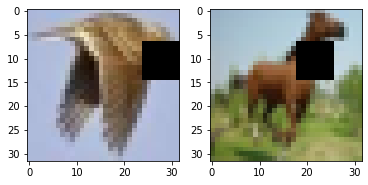

In [ ]:
cutout_obj = Cutout(1, 8)
plt.subplot(1, 2, 1)
plt.imshow(cutout_obj.__call__(sample_image_1))
plt.subplot(1, 2, 2)
plt.imshow(cutout_obj.__call__(sample_image_2))

2. Using CIFAR10 datasest and Resnet-44 we will first apply simple data augmentation as in He et al. (look at Section 4.2 of He et al.) and train the model with batch size 64. Note that testing is always done with original images. Plot validation error vs number of training epochs.

## Solution 4.2:

In [ ]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import time
warnings.filterwarnings("ignore")

# Training parameters
batch_size = 64  # orig paper trained all networks with batch_size=128
epochs = 100
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Helps in defining the depth of ResNet, Here for 7, it will be ResNet44
n = 7

# Model version
# Orig paper: version = 1 (ResNet v1)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_v1(input_shape=input_shape, depth=depth)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=[-4, 4],
    # randomly shift images vertically
    height_shift_range=[-4, 4],
    # set range for random shear
    shear_range=0.,
    # set range for random zoom
    zoom_range=0.,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='constant',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=0.5,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format="channels_last",
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

start = time.time()
# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_test, y_test),
                              epochs=epochs, verbose=1, workers=4,
                              callbacks=callbacks)
end = time.time()
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(f"Training Time: {end - start}")

simple_val_accuracies = history.history['val_accuracy']

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_n

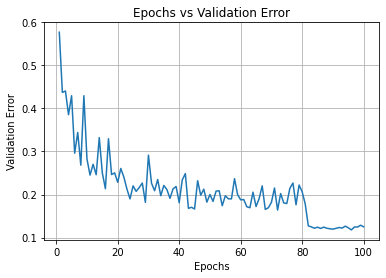

In [ ]:
#Plotting
plt.plot(range(1, 101), [1 - acc for acc in simple_val_accuracies])
plt.xlabel('Epochs')
plt.ylabel('Validation Error')
plt.title('Epochs vs Validation Error')
plt.grid()

3. Next use cutout for data augmentation in Resnet-44 as in Hoffer et al. and train the model and use the same set-up in your experiments. Plot validation error vs number of epochs for different values of M (2,4,8,16,32) where M is the number of instances generated from an input sample after applying cutout M times effectively increasing the batch size to M · B, where B is the original batch size (before applying cutout augmentation). You will obtain a figure similar to Figure 3(a) in the paper by Hoffer et al. Also compare the number of epochs and wallclock time to reach 94% accuracy for different values of M. Do not run any experiment for more than 100 epochs. If even after 100 epochs of training you did not achieve 94% then just report the accuracy you obtain and the corresponding wallclock time to train for 100 epochs. Before attempting this question it is advisable to read paper by Hoffer et al. and especially Section 4.1. 

## Solution 4.3:

In [ ]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from IPython.core.display import HTML
import time
warnings.filterwarnings("ignore")
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

# Training parameters
batch_size = 64  # orig paper trained all networks with batch_size=128
epochs = 100
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Helps in defining the depth of ResNet, Here for 7, it will be ResNet44
n = 7

# Model version
# Orig paper: version = 1 (ResNet v1)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

def apply_mask(image, size=10, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

def batch_generator(x, y, epochs, m, batch_size, augment=None):
    for _ in range(epochs):
        n = x.shape[0]
        reorder = np.random.permutation(n)
        cursor = 0
        while cursor + batch_size < x.shape[0]:
            x_batch = x[reorder[cursor:cursor+batch_size]]
            y_batch = y[reorder[cursor:cursor+batch_size]]
            if augment != None:
                yield np.array([augment(xx) for xx in x_batch for rep in range(m)]), np.array([yy for yy in y_batch for rep in range(m)])
            else:
                yield x_batch, y_batch
            cursor += batch_size

val_acc_cutout = []
epochs = 100
durations = []
for i in [2,4,8,16,32]:
    model = resnet_v1(
        input_shape=x_train.shape[1:],
        depth=44
    )      
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=lr_schedule(0)),
        metrics=['accuracy']
    )    

    # Prepare model model saving directory.
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, model_name)

    # Prepare callbacks for model saving and for learning rate adjustment.
    checkpoint = ModelCheckpoint(filepath=filepath,
                                monitor='val_accuracy',
                                verbose=0,
                                save_best_only=True)

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                  cooldown=0,
                                  patience=5,
                                  min_lr=0.5e-6)

    callbacks = [checkpoint, lr_reducer, lr_scheduler]

    start = time.time()
    hist = model.fit_generator(
        batch_generator(
            x_train,
            y_train,
            m=i,
            batch_size=64,
            epochs=epochs, 
            augment=apply_mask
        ),
        epochs=epochs, 
        validation_data=(x_test,y_test),
        steps_per_epoch=np.floor(x_train.shape[0]/64.0),
        verbose=0,
        callbacks=callbacks
    )
    durations.append(time.time()-start)
    val_err_cutout.append([1 - acc for acc in hist.history['val_accuracy']])

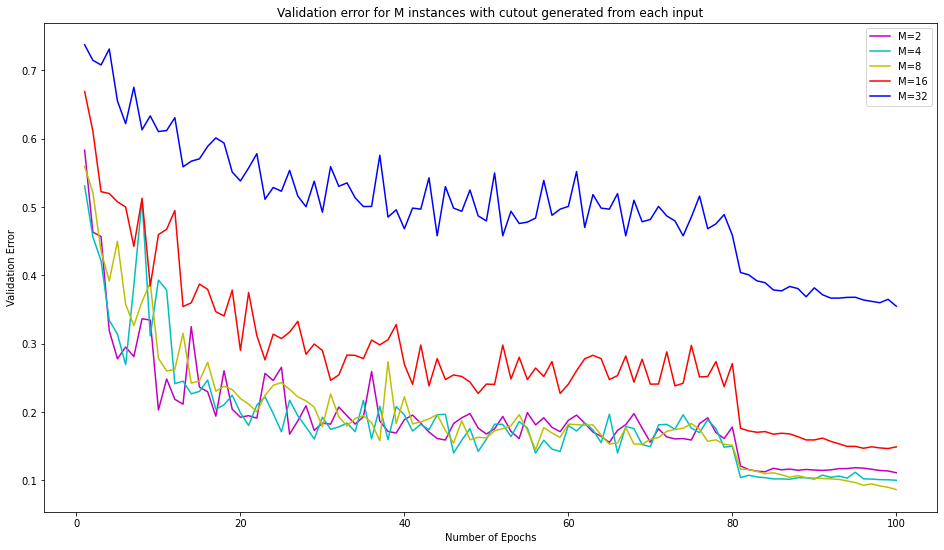

In [21]:
fig = plt.figure(figsize = (16, 9))
cutout2_data, cutout4_data, cutout8_data, cutout16_data, cutout32_data = val_err_cutout
plt.plot(range(1,101),cutout2_data,"m-")
plt.plot(range(1,101), cutout4_data,"c-")
plt.plot(range(1,101), cutout8_data,"y-")
plt.plot(range(1,101), cutout16_data,"r-")
plt.plot(range(1,101), cutout32_data,"b-")
plt.legend(["M=2","M=4","M=8","M=16","M=32"])
plt.title("Validation error for M instances with cutout generated from each input")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Error")
plt.savefig("err_cutout.png")
plt.show()

The Accuracy reported here is the maximum for the case of M = 8. The Accuracy then is 91.34%. The corresponding training time is shown below.

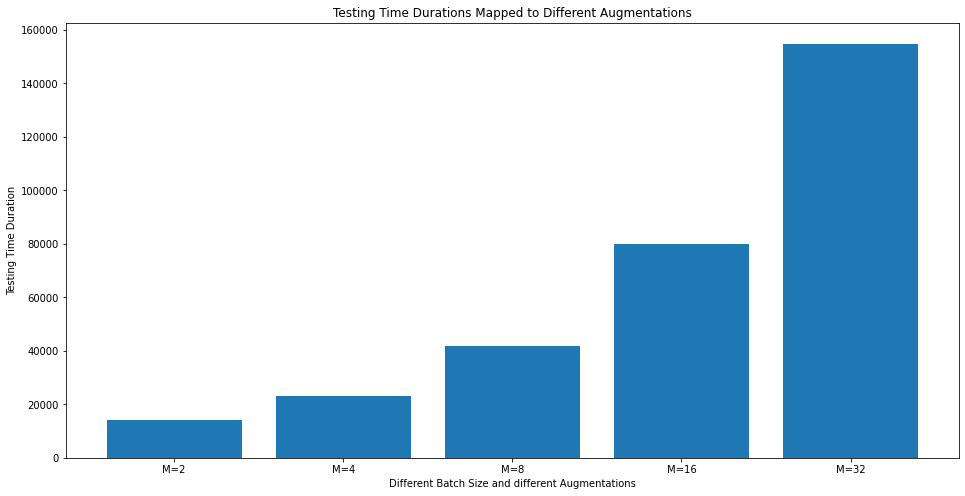

In [91]:
fig = plt.figure(figsize = (16, 8))
plt.bar(["M=2","M=4","M=8","M=16","M=32"], durations)
title = 'Testing Time Durations Mapped to Different Augmentations'
plt.title(title)
plt.xlabel('Different Batch Size and different Augmentations')
plt.ylabel('Testing Time Duration')
plt.savefig("test_times_cutout.png")
plt.show()